## 1. Cài đặt thư viện (Import and Install Dependencies)

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## 2. Các điểm quan trọng được xác định trên cơ thể người bằng phương pháp MP Holistic (Keypoints using MP Holistic)

In [140]:
mp_holistic = mp.solutions.holistic #Mô hình có khả năng phát hiện và theo dõi toàn bộ cơ thể
mp_drawing = mp.solutions.drawing_utils #Công cụ vẽ từ MediaPipe giúp trực quan hoá các điểm mốc và tư thế được phát hiện trên hình ảnh hoặc video

In [141]:
#Lấy mô hình toàn diện từ Mediapipe và khởi tạo mô hình  
mp_holistic = mp.solutions.holistic  
holistic_model = mp_holistic.Holistic(  
    min_detection_confidence=0.5,  
    min_tracking_confidence=0.5  
)  

#Khởi tạo công cụ vẽ để vẽ các điểm mốc khuôn mặt trên hình ảnh  
mp_drawing = mp.solutions.drawing_utils  


In [142]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Chuyển đổi không gian màu
    image.flags.writeable = False                  #Ngăn chặn việc thay đổi bức ảnh khi mô hình đang xử lý
    results = model.process(image)                 #Xử lý hình ảnh bằng mô hình
    image.flags.writeable = True                   #Có thể chỉnh sửa ảnh nếu cần
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #Chuyển đổi lại sang không gian màu BGR
    return image, results

In [143]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) #Vẽ đường viền khuôn mặt
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS #Vẽ kết nối giữa các mốc trên khuôn mặt
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #Vẽ kết nối các mốc tư thế
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  #Vẽ các mốc cho tay trái
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Vẽ các mốc cho tay phải

In [144]:
def draw_styled_landmarks(image, results):
    #Vẽ đường viền khuôn mặt
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,  
                           mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),   
                           mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    #Vẽ kết nối các mốc tư thế
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    #Vẽ các mốc cho tay trái
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    #Vẽ các mốc cho tay phải
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [145]:
cap = cv2.VideoCapture(0)
#Thiết lập mô hình Mediapipe
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #Đọc hình ảnh từ camera
        ret, frame = cap.read()
        #Thực hiện phát hiện và theo dõi dự đoán
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #Vẽ các điểm mốc
        draw_styled_landmarks(image, results)
        
        #Hiển thị trên màn hình
        cv2.imshow('Dữ liệu từ OpenCV', image)
        
        #Dừng chương trình một cách đẹp
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    
        

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [146]:
#Số điểm mốc tay phải
len(results.right_hand_landmarks.landmark)

21

In [147]:
results

mediapipe.python.solution_base.SolutionOutputs

In [148]:
#Vẽ các điểm mốc tương ứng với dữ liệu lên khung hình
draw_landmarks(frame, results)

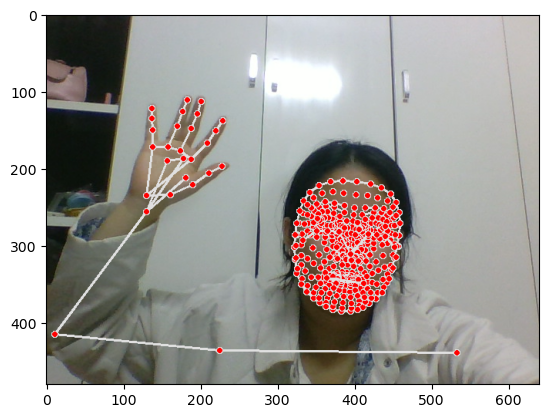

In [149]:
# Hiển thị chuyển đổi khung hình từ định dạng màu BGR sang RGB  
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## 3. Trích xuất giá trị điểm mốc (Extract Keypoint Values)

In [150]:
#Số điểm mốc tay trái
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [151]:
#Thu thập tọa độ 3D và thông tin độ khả thi của từng điểm mốc tư thế và lưu trữ chúng vào danh sách
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [152]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [153]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)

IndentationError: unexpected indent (3987811915.py, line 2)

In [154]:
#Trích xuất các điểm mốc
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [155]:
result_test = extract_keypoints(results)

In [156]:
result_test

array([ 0.61854631,  0.64970106, -1.03457034, ...,  0.21520382,
        0.25420892, -0.03738151])

In [157]:
np.save('0', result_test)

In [158]:
np.load('0.npy')

array([ 0.61854631,  0.64970106, -1.03457034, ...,  0.21520382,
        0.25420892, -0.03738151])

## 4. Thiết lập thư mục để thu thập dữ liệu (Setup Folders for Collection)

In [159]:
from PIL import Image, ImageDraw, ImageFont

#Đường dẫn cho dữ liệu xuất ra, các mảng numpy  
DATA_PATH = os.path.join("DATA_DL")

#Các hành động (Actions that we try to detect)
actions = np.array(['Xin chào', 'Cô giáo', 'Cảm ơn'])

#Số lượng video mà chương trình sẽ thu thập dữ liệu  
no_sequences = 30

#Mỗi video sẽ có độ dài 30 khung hình 
sequence_length = 30

In [160]:
for action in actions: 
    #Tạo thư mục con theo yêu cầu
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 5. Thu thập các giá trị điểm chính để đào tạo và thử nghiệm (Collect Keypoint Values for Training and Testing)

In [84]:
cap = cv2.VideoCapture(0)
#Thiết lập mô hình Mediapipe 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #Vòng lặp qua các hành động
    for action in actions:
        #Vòng lặp qua các chuỗi (video)
        for sequence in range(no_sequences):
            #Vòng lặp qua độ dài video (chuỗi)
            for frame_num in range(sequence_length):
                
                #Đọc và xử lý khung hình
                #Đọc feed
                ret, frame = cap.read()

                #Thực hiện phát hiện
                image, results = mediapipe_detection(frame, holistic)

                #Vẽ các điểm mốc
                draw_styled_landmarks(image, results)
                
                #Áp dụng logic chờ (Apply wait logic)
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    #Hiển thị lên màn hình (Show to screen)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    #Hiển thị lên màn hình (Show to screen)
                    cv2.imshow('OpenCV Feed', image)
                
                #Xuất các điểm mốc (Export keypoints)
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                #Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

## 6. Tiền xử lý dữ liệu và tạo nhãn (Preprocess Data and Create Labels and Features)

In [85]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [86]:
#Tạo từ điền 
label_map = {label:num for num, label in enumerate(actions)}

In [87]:
label_map

{'Xin chào': 0, 'Cô giáo': 1, 'Cảm ơn': 2}

In [88]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            #Tải dữ liệu khung
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            #Thêm khung vào window
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [89]:
np.array(sequences).shape

(90, 30, 1662)

In [90]:
np.array(labels).shape

(90,)

In [91]:
X = np.array(sequences)

In [92]:
X.shape

(90, 30, 1662)

In [93]:
y = to_categorical(labels).astype(int)

In [94]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [95]:
#Đánh giá mô hình học máy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [96]:
y_test.shape

(5, 3)

## 7. Xây dựng và huấn luyện mạng nơ-ron LSTM (Build and Train LSTM Neural Network)

In [97]:
#Importcác lớp và module cần thiết:
from tensorflow.keras.models import Sequential #Một dạng mô hình trong Keras, nơi các lớp (layers) được xếp chồng lên nhau theo thứ tự tuyến tính, rất phù hợp cho các bài toán cơ bản và đơn giản.
from tensorflow.keras.layers import LSTM, Dense 
from tensorflow.keras.callbacks import TensorBoard #Công cụ trực quan hóa cho TensorFlow

In [98]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [99]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\VO NU MAI NGOC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [161]:
res = [.7, 0.2, 0.1]

In [162]:
actions[np.argmax(res)]

'Xin chào'

In [163]:
#Biên dịch mô hình
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [103]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - categorical_accuracy: 0.3033 - loss: 1.2848
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.2486 - loss: 2.6604
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.3914 - loss: 1.4995
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3561 - loss: 1.1110
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3737 - loss: 1.0877
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.3777 - loss: 1.3049
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.3483 - loss: 1.1494
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - categorical_accuracy: 0.3288 - loss: 1.1038
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.3249 - loss: 1.1038
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.2935 - loss: 1.1017
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.5558 - loss: 0.9665
Epoch 126/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - categorical_accuracy: 0.2760 - loss: 127.5264
Epoch 127/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.2015 - loss: 1.2709
Epoch 128/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.3347 - loss: 29.1831
Epoch 129/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.2916 - loss: 8.0242 
Epoch 130/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3131 - loss: 14.5733
Epoch 131/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.3228 - loss: 6.4923
Epoch 132/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.3757 - loss: 31.0789
Epoch 133/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3307 - loss: 33.3746
Epoch 134/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.3307 - loss: 5.5015
Epoch 135/200
3/3 ━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - categorical_accuracy: 0.3932 - loss: 1.0976
Epoch 188/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3737 - loss: 1.0981
Epoch 189/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3776 - loss: 1.0957
Epoch 190/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3386 - loss: 1.1004
Epoch 191/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3268 - loss: 1.0989
Epoch 192/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3229 - loss: 1.1001
Epoch 193/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - categorical_accuracy: 0.3425 - loss: 1.0983
Epoch 194/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3347 - loss: 1.1002
Epoch 195/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3542 - loss: 1.0978
Epoch 196/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3347 - loss: 1.0983
Epoch 197/200
3/3 ━━━━━━━━━━━━━━━━

In [104]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

## 8. Dự đoán (Make Predictions)

In [105]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


In [106]:
actions[np.argmax(res[1])]

'Cảm ơn'

In [107]:
actions[np.argmax(y_test[1])]

'Cô giáo'

## 9. Lưu (Save Weights)

In [108]:
model.save('model1.h5')

In [164]:
model.load_weights('model1.h5')

## 10. Đánh giá sử dụng và độ chính xác (Evaluation using Confusion Matrix and Accuracy)

In [110]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [111]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [112]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [113]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [2, 0]],

       [[3, 0],
        [2, 0]],

       [[0, 4],
        [0, 1]]], dtype=int64)

In [114]:
accuracy_score(ytrue, yhat)

0.2

## 11. Thử nghiệm thời gian thực (Test in Real Time)

In [165]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

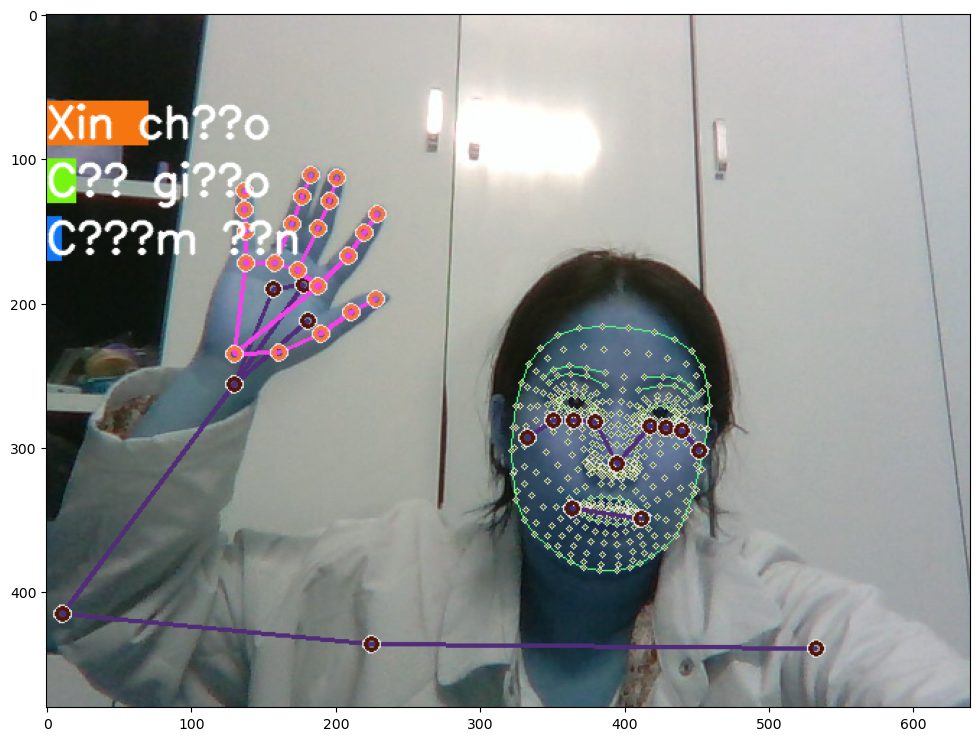

In [166]:
plt.figure(figsize=(16,9))
plt.imshow(prob_viz(res, actions, image, colors))

In [117]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Cảm ơn
<class 'mediapipe.python.solution_bas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Cảm ơn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Cảm ơn
<class 'mediapipe.python.solution_bas

In [168]:
import cv2
import mediapipe as mp
import numpy as np
from gtts import gTTS
import os

# New detection variables
sequence = []
sentence = []
threshold = 0.5
last_spoken_word = ""  # Biến để lưu từ cuối cùng đã phát

# Set mediapipe model 
with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    cap = cv2.VideoCapture(0)
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            # Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
         
                
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5: 
                    sentence = sentence[-5:]

                # Viz probabilities
                image = prob_viz(res, actions, image, colors)

                if len(sentence) > 0:
                    last_word = sentence[-1]
                    # Chỉ phát âm nếu từ mới khác từ cuối cùng đã phát
                    if last_word != last_spoken_word:
                        tts = gTTS(last_word, lang='vie')  # Ngôn ngữ tiếng Anh
                        tts.save("output.mp3")
                        os.system("start output.mp3")  # Windows; dùng 'xdg-open' cho Linux hoặc 'open' cho macOS
                        last_spoken_word = last_word  # Cập nhật từ cuối cùng đã phát

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Cảm ơn


ValueError: Language not supported: vie

In [ ]:
res[np.argmax(res)] > threshold

In [56]:
os.remove("output.mp3")


In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))